In [1]:
import pandas as pd

# 根据用户用电特征进行聚类

In [2]:
df_user_num=pd.read_csv("list_user_num.csv",encoding='gbk')

In [3]:
# user_data_2015_2017=pd.read_csv("CleanedPowerConsumingData_2015_2017.csv") #是根据月度数据进行聚类的，所以本数据集可以不使用

In [4]:
# user_data_2015_2017.shape

In [5]:
user_data_monthly_2015_2017=pd.read_csv("CleanedPowerConsumingData_monthly_2015_2017.csv",encoding="gbk")

In [6]:
user_data_monthly_2015_2017.shape

(128292, 45)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.signal import savgol_filter
#from dtw import dtw
from numpy.linalg import norm
import scipy.stats as stats
from itertools import permutations, combinations
from scipy.spatial.distance import cdist
from scipy.spatial.distance import euclidean
import warnings
warnings.filterwarnings('ignore')
user_data_monthly=user_data_monthly_2015_2017

In [8]:
user_data_monthly['日均用电量']=user_data_monthly['尖峰日均用电量']+user_data_monthly['高峰日均用电量']+user_data_monthly['平段日均用电量']+user_data_monthly['谷段日均用电量']
znorm_data = stats.zscore(user_data_monthly['日均用电量'].values)
znorm_data1 = stats.zscore(user_data_monthly['尖峰平均负荷'].values)
znorm_data2 = stats.zscore(user_data_monthly['谷段平均负荷'].values)
user_data_monthly['日均用电量'] = znorm_data
user_data_monthly['尖峰平均负荷'] = znorm_data1
user_data_monthly['谷段平均负荷'] = znorm_data2

In [9]:
user_data_monthly.head()

,编号,HOUR1,HOUR2,HOUR3,HOUR4,HOUR5,HOUR6,HOUR7,HOUR8,HOUR9,...,尖峰平均负荷,高峰平均负荷,平段平均负荷,谷段平均负荷,尖峰日均用电量,高峰日均用电量,平段日均用电量,谷段日均用电量,日期,日均用电量
0,2,0.030000,0.010000,0.020000,0.020000,0.030000,0.010000,0.03,0.02,0.030000,...,-0.083406,0.002857,0.155417,-0.075483,2.158750,0.020000,0.932500,1.677500,2015-09-30,-0.084336
1,2,0.050000,0.100000,0.080000,0.090000,0.070000,0.080000,0.12,0.05,0.060000,...,-0.083411,0.002627,0.151452,-0.075486,2.125161,0.018387,0.908710,1.627419,2015-10-31,-0.084338
2,2,20.820000,20.840000,20.840000,20.810000,20.820000,13.510000,0.09,0.07,0.090000,...,-0.083333,0.038095,0.153889,-0.075254,2.609333,0.266667,0.923333,5.695333,2015-11-30,-0.084244
3,2,26.500000,26.580000,26.590000,26.540000,26.520000,16.660000,0.09,0.09,0.050000,...,-0.083335,0.048571,0.146290,-0.075206,2.600968,0.340000,0.877742,6.537419,2015-12-31,-0.084227
4,2,24.907345,24.907062,24.897627,24.917062,23.519605,13.712994,0.12,0.05,0.040282,...,-0.083354,0.027408,0.140683,-0.075232,2.479098,0.191859,0.844099,6.072750,2017-01-31,-0.084242


In [10]:
user_data_avg=user_data_monthly.groupby('编号').agg({'日均用电量': np.mean,'尖峰平均负荷': np.mean,'谷段平均负荷': np.mean,'尖峰用电量占比': np.mean,'高峰用电量占比': np.mean,'平段用电量占比':np.mean,'谷段用电量占比':np.mean})

In [11]:
user_data_avg.head(10)

,日均用电量,尖峰平均负荷,谷段平均负荷,尖峰用电量占比,高峰用电量占比,平段用电量占比,谷段用电量占比
编号,,,,,,,
2,-0.084243,-0.083366,-0.075235,0.265081,0.015945,0.104082,0.614892
52,0.322894,0.397317,0.226794,0.144506,0.324196,0.275149,0.256149
54,-0.080033,-0.079013,-0.071476,0.128555,0.279296,0.277941,0.314208
55,-0.083713,-0.082917,-0.074853,0.142884,0.253191,0.250896,0.353029
62,-0.057090,-0.050890,-0.052353,0.148266,0.295971,0.262961,0.292802
68,-0.063803,-0.068440,-0.068608,0.092516,0.431760,0.356784,0.118940
81,-0.082444,-0.082233,-0.074410,0.099005,0.350564,0.336010,0.214421
82,0.186036,0.177756,0.143603,0.117373,0.325590,0.283471,0.273566
102,-0.037653,-0.039767,-0.041865,0.117711,0.356913,0.272692,0.252684


In [12]:
from pandas import DataFrame,Series
from sklearn.cluster import KMeans #导入K均值聚类算法
k = 8 # 聚为5类

#调用k-means算法，进行聚类分析
user_data_records=user_data_avg
user_data_avg=user_data_avg.iloc[:,3:]

In [13]:
user_data_avg.head()

,尖峰用电量占比,高峰用电量占比,平段用电量占比,谷段用电量占比
编号,,,,
2,0.265081,0.015945,0.104082,0.614892
52,0.144506,0.324196,0.275149,0.256149
54,0.128555,0.279296,0.277941,0.314208
55,0.142884,0.253191,0.250896,0.353029
62,0.148266,0.295971,0.262961,0.292802


In [14]:
kmodel = KMeans(n_clusters=k, n_jobs=4)# n_job是并行数，一般等于CPU数较好
kmodel.fit(user_data_avg)
labels = kmodel.labels_#查看各样本类别

In [15]:
labels_df = DataFrame(labels,columns=['Cluster_Num']) #类别标签
cluster_centers= DataFrame(kmodel.cluster_centers_, columns=user_data_avg.columns) # 保存聚类中心

In [16]:
cluster_centers

,尖峰用电量占比,高峰用电量占比,平段用电量占比,谷段用电量占比
0,0.111521,0.398756,0.309845,0.179877
1,0.079718,0.226313,0.213259,0.480710
2,0.146757,0.329096,0.278189,0.245958
3,0.074886,0.486299,0.353229,0.085585
4,0.323821,0.189777,0.234417,0.251984
5,0.134982,0.289047,0.252749,0.323223
6,0.103452,0.095370,0.140056,0.661122
7,0.194919,0.356131,0.312854,0.136096


In [17]:
cluster_stat=labels_df['Cluster_Num'].value_counts()  #统计各类别客户数

In [18]:
cluster_stat

2    2310
5    1814
0    1752
3     891
7     672
1     271
6     218
4     117
Name: Cluster_Num, dtype: int64

In [19]:
Cluster_Centers_with_stat = pd.concat([cluster_stat,cluster_centers],axis=1)
Cluster_Centers_with_stat.index.name='labels'

In [20]:
user_data_avg['类别']=labels

In [21]:
user_data_avg.head()

,尖峰用电量占比,高峰用电量占比,平段用电量占比,谷段用电量占比,类别
编号,,,,,
2,0.265081,0.015945,0.104082,0.614892,6
52,0.144506,0.324196,0.275149,0.256149,2
54,0.128555,0.279296,0.277941,0.314208,5
55,0.142884,0.253191,0.250896,0.353029,5
62,0.148266,0.295971,0.262961,0.292802,5


In [22]:
user_data_records['类别']=labels
user_data_records.head()
user_data_records.to_csv("user_data_clusters.csv",encoding='gbk')

In [23]:
subset = cluster_centers.copy()
subset = subset.round(3)
subset.to_excel('cluster_radar.xlsx')

In [24]:
subset

,尖峰用电量占比,高峰用电量占比,平段用电量占比,谷段用电量占比
0,0.112,0.399,0.310,0.180
1,0.080,0.226,0.213,0.481
2,0.147,0.329,0.278,0.246
3,0.075,0.486,0.353,0.086
4,0.324,0.190,0.234,0.252
5,0.135,0.289,0.253,0.323
6,0.103,0.095,0.140,0.661
7,0.195,0.356,0.313,0.136


In [25]:
data_subset = subset.as_matrix()
data_subset

array([[0.112, 0.399, 0.31 , 0.18 ],
       [0.08 , 0.226, 0.213, 0.481],
       [0.147, 0.329, 0.278, 0.246],
       [0.075, 0.486, 0.353, 0.086],
       [0.324, 0.19 , 0.234, 0.252],
       [0.135, 0.289, 0.253, 0.323],
       [0.103, 0.095, 0.14 , 0.661],
       [0.195, 0.356, 0.313, 0.136]])

In [26]:
#-*- coding: utf-8 -*-
#画出特征雷达图，代码接KMeans_cluster.py

labels_columns = ['日均用电量','尖峰平均负荷','谷段平均负荷','尖峰用电量占比','高峰用电量占比','平段用电量占比','谷段用电量占比'] #标签

plot_data = data_subset[:,:]

In [27]:
plot_data

array([[0.112, 0.399, 0.31 , 0.18 ],
       [0.08 , 0.226, 0.213, 0.481],
       [0.147, 0.329, 0.278, 0.246],
       [0.075, 0.486, 0.353, 0.086],
       [0.324, 0.19 , 0.234, 0.252],
       [0.135, 0.289, 0.253, 0.323],
       [0.103, 0.095, 0.14 , 0.661],
       [0.195, 0.356, 0.313, 0.136]])

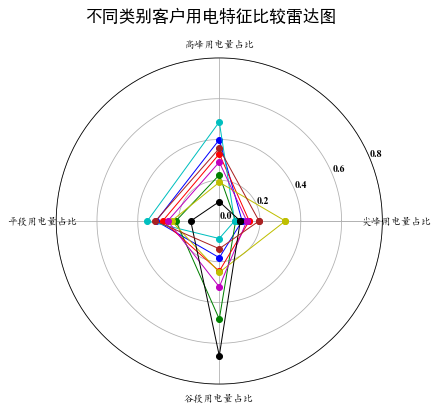

In [28]:
color = ['b', 'g', 'r', 'c', 'y','m','k','#aa2222'] #指定颜色

angles1 = np.linspace(0, 2*np.pi,4, endpoint=False)
plot_data1 = np.concatenate((plot_data, plot_data[:,[0]]), axis=1) # 闭合
angles = np.concatenate((angles1, [angles1[0]])) # 闭合

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, polar=True) #polar参数！！
for i in range(len(plot_data1)):
  ax.plot(angles, plot_data1[i], 'o-', color = color[i], label = u'用户群'+str(i), linewidth=1)# 画线

ax.set_rgrids(np.arange(0.0, 1, 0.2), fontproperties="Times New Roman")
ax.set_thetagrids(angles * 180/np.pi, labels_columns[3:], fontproperties="KaiTi")
#plt.legend(loc = 'low')
plt.rcParams['font.size'] = 14
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

fig.text(0.5, 0.965, u'不同类别客户用电特征比较雷达图',  #text()自由添加文本的最大作用就是注释
             horizontalalignment='center', color='black', weight='bold',
             size='large')
plt.savefig('radar.jpg')
plt.show()

In [29]:
user_data_avg.head()

,尖峰用电量占比,高峰用电量占比,平段用电量占比,谷段用电量占比,类别
编号,,,,,
2,0.265081,0.015945,0.104082,0.614892,6
52,0.144506,0.324196,0.275149,0.256149,2
54,0.128555,0.279296,0.277941,0.314208,5
55,0.142884,0.253191,0.250896,0.353029,5
62,0.148266,0.295971,0.262961,0.292802,5


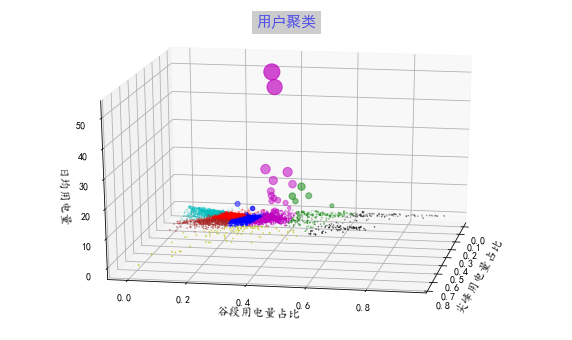

In [33]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
label_font = {
    'color': 'k',
    'size': 12,
    'weight': 'normal',
    'name':'KaiTi'
}


fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection="3d")  # 添加子坐标轴，111表示1行1列的第一个子图

markers=['o','^','s','x','p','*','d','D']    
color_table = ['r', 'g', 'b', 'c', 'y','m','k','#aa2222'] 
labels_color=[]
labels_marker=[]
for i in labels:
   labels_color.append(color_table[i]) 
x = user_data_avg['尖峰用电量占比']
y = user_data_avg['谷段用电量占比']
z = user_data_records['日均用电量']
ax.scatter(x, y, z, c=labels_color,marker=markers[0],s=abs(z)*5) #这里marker的尺寸和z的大小成正比

ax.set_xlabel("尖峰用电量占比", fontdict=label_font)
ax.set_ylabel("谷段用电量占比", fontdict=label_font)
ax.set_zlabel("日均用电量", fontdict=label_font)
ax.set_title("用户聚类", alpha=0.6, color="b", size=15, weight='bold', backgroundcolor="#cccccc")   #子图的title
#ax.legend(loc="upper left")    #legend的位置左上
ax.view_init(elev=20,azim=10)#改变绘制图像的视角,即相机的位置,azim沿着z轴旋转，elev沿着y轴
#设置坐标轴的label和标题
plt.savefig('user_clusters.jpg')
plt.show()

In [34]:
user_data_records.describe()

,日均用电量,尖峰平均负荷,谷段平均负荷,尖峰用电量占比,高峰用电量占比,平段用电量占比,谷段用电量占比,类别
count,8045.000000,8045.000000,8045.000000,8045.000000,8045.000000,8045.000000,8045.000000,8045.000000
mean,-0.003267,-0.003137,-0.003312,0.131644,0.343108,0.284005,0.241244,2.873089
std,0.907937,0.909669,0.907841,0.052244,0.085538,0.050472,0.117981,2.205262
min,-0.084430,-0.083752,-0.075579,0.000342,0.000000,0.035766,0.000536,0.000000
25%,-0.079583,-0.079132,-0.073046,0.105125,0.296483,0.257440,0.168494,1.000000
50%,-0.067722,-0.068183,-0.066792,0.130075,0.338479,0.280449,0.232406,2.000000
75%,-0.040361,-0.040819,-0.046612,0.156556,0.390959,0.309693,0.297082,5.000000
max,51.816407,53.162779,50.307758,0.764082,0.809256,0.643182,0.931403,7.000000


In [35]:
user_data_records[user_data_avg['类别']==0].describe()

,日均用电量,尖峰平均负荷,谷段平均负荷,尖峰用电量占比,高峰用电量占比,平段用电量占比,谷段用电量占比,类别
count,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.0
mean,-0.054941,-0.056343,-0.060052,0.111541,0.398878,0.309851,0.179730,0.0
std,0.047998,0.047187,0.026740,0.024372,0.026645,0.028026,0.028244,0.0
min,-0.084430,-0.083752,-0.075579,0.013648,0.311038,0.181647,0.101428,0.0
25%,-0.079309,-0.079304,-0.073044,0.095826,0.378988,0.291081,0.158544,0.0
50%,-0.069923,-0.070773,-0.068305,0.111873,0.396624,0.308395,0.181426,0.0
75%,-0.051451,-0.053660,-0.058291,0.128931,0.415635,0.326557,0.200241,0.0
max,0.399323,0.455087,0.256814,0.172161,0.508920,0.443335,0.306641,0.0
